In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
#!nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [1]:
import os
import keras
import tensorflow as tf
# 請嘗試設定 GPU：os.environ
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = x / 255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(
    input_shape, 
    output_units = 10, 
    num_neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=10, activation='softmax', name = 'output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

W0718 14:49:30.393081 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 14:49:30.394078 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 14:49:30.396075 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0718 14:49:33.724873 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 14:49:33.730890 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0718 14:49:34.908027 12712 deprecation.py:323] From c:\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 14:49:34.951911 12712 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.9438 - acc: 0.2990 - val_loss: 1.7837 - val_acc: 0.3660
Epoch 2/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.7066 - acc: 0.3895 - val_loss: 1.6412 - val_acc: 0.4172
Epoch 3/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.6202 - acc: 0.4204 - val_loss: 1.5735 - val_acc: 0.4407
Epoch 4/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.5508 - acc: 0.4477 - val_loss: 1.5771 - val_acc: 0.4406
Epoch 5/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.4972 - acc: 0.4661 - val_loss: 1.5044 - val_acc: 0.4595
Epoch 6/100
50000/50000 [==============================] - 2s 48us/step - loss: 1.4688 - acc: 0.4759 - val_loss: 1.4923 - val_acc: 0.4686
Epoch 7/100
50000/50000 [==============================] - 2s 47us/step - loss: 1.4351 - acc: 0.4862 - val_loss: 1.4989 - 

50000/50000 [==============================] - 2s 47us/step - loss: 0.5519 - acc: 0.8002 - val_loss: 1.9708 - val_acc: 0.5151
Epoch 60/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.5498 - acc: 0.8013 - val_loss: 2.0046 - val_acc: 0.5153
Epoch 61/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.5527 - acc: 0.8009 - val_loss: 2.0445 - val_acc: 0.5092
Epoch 62/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.5147 - acc: 0.8170 - val_loss: 2.0320 - val_acc: 0.5175
Epoch 63/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.5102 - acc: 0.8172 - val_loss: 2.0423 - val_acc: 0.5130
Epoch 64/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.5177 - acc: 0.8128 - val_loss: 2.0710 - val_acc: 0.5109
Epoch 65/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.4902 - acc: 0.8256 - val_loss: 2.0931 - val_acc: 0.5168
Epoch 66/100
50000/50000 [==============

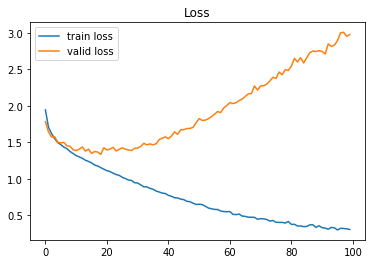

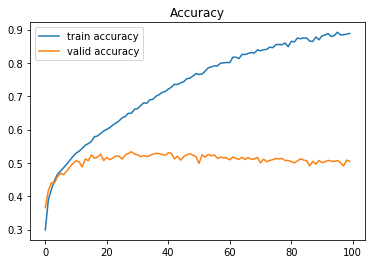

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度